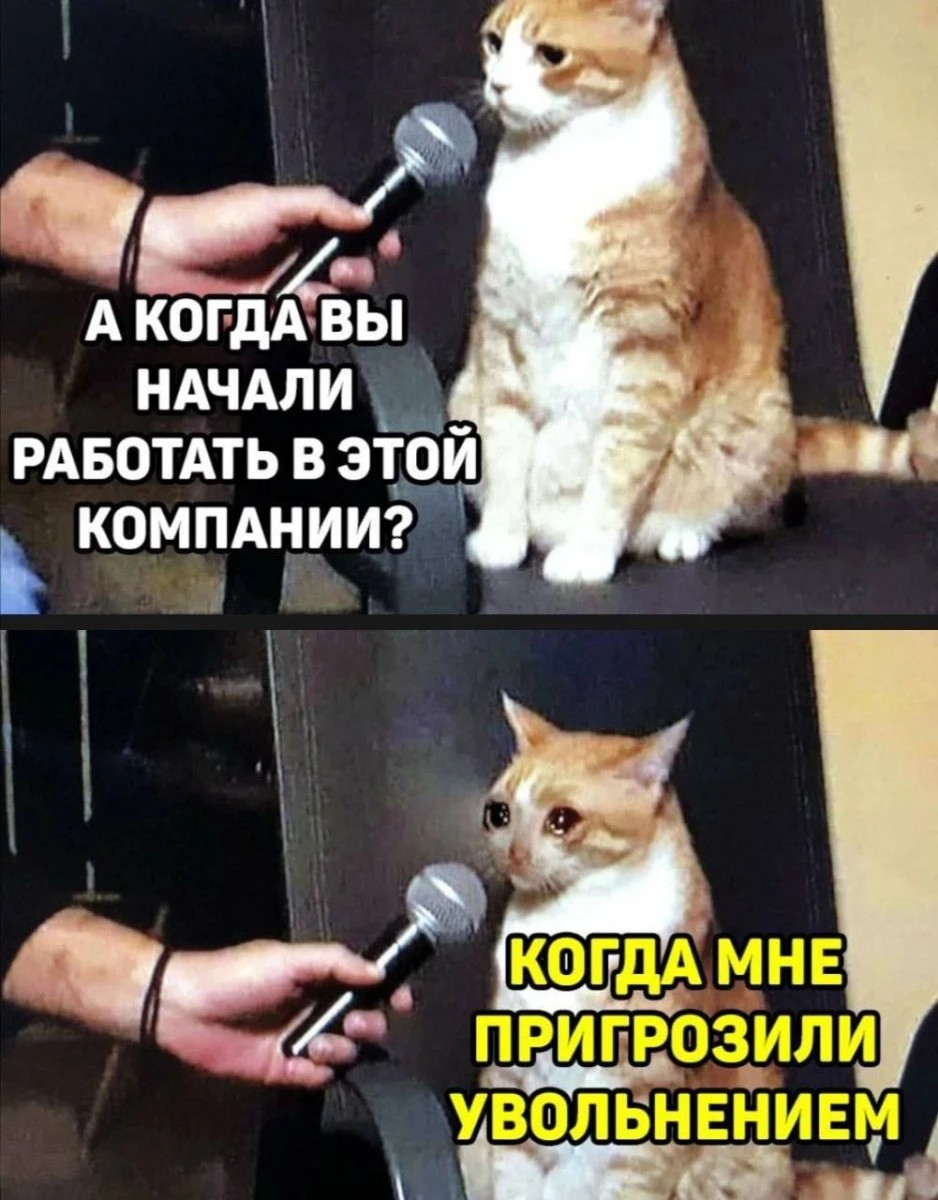

Хеш-функция - такая функция, которая элементу из некоторого бесконечного множества входных значений ставит в **однозначное соответствие** элемент из ограниченного множества выходных значений.

Обратите внимание на определение из Википедии:

Хеш-функция (англ. hash function от hash — «превращать в фарш», «мешанина»), или функция свёртки — функция, осуществляющая преобразование массива входных данных произвольной длины в выходную битовую строку установленной длины, выполняемое определённым алгоритмом. 

Так вот, определение из Википедии не совсем верное... на выходе хеш-функции может быть строка произвольной, но ограниченной длины. Пример - `hash()` Python

In [6]:
hash(help)

270628069

In [4]:
hash('s')

-1191585054487430453

In [7]:
hash('ы')

-2672041103790932324

Пример хеш-функции:

In [17]:
def my_hash(key: int):
    h = key % 10
    return h

In [18]:
my_hash(23), my_hash(33), my_hash(34), my_hash(-34)

(3, 3, 4, 6)

Хеш-функция `my_hash` любому входному значению поставит в однозначное соответствие число от 0 до 9. Если бы `my_hash` всегда возращала только одно значение, скажем 0, мы бы говорили о такой хеш-функции как о самой несовершенной. 

In [19]:
def worst_hash(key: int):
    return 0

In [20]:
worst_hash(23), worst_hash(33), worst_hash(34), worst_hash(-34)

(0, 0, 0, 0)

Хеш-функция является ключём к пониманию структуры данных хеш-таблица

___

Осноовная идея хеш-таблицы - **быстрый доступ к значению по ключу**

Хеш-табли́ца — это структура данных, реализующая интерфейс ассоциативного массива, а именно, она позволяет хранить пары (ключ, значение) и выполнять три операции: операцию добавления новой пары, операцию удаления и операцию поиска пары по ключу.

Хеш-таблица является массивом `H`. 

Выполнение любой операции в хеш-таблице начинается с вычисления хеш-функции от ключа. Получающееся хеш-значение `i = hash(key)` играет роль индекса в массиве `H`

Затем выполняемая операция (добавление, удаление или поиск) перенаправляется объекту, который хранится в соответствующей ячейке массива `H[i]`

И так:
1. `my_hash` будем использовать для вычисления хеша (и позиции элемента)
2. запишем несколько пар ключ-значение `1000-А`, `241-Б`, `87-В`
3. `H` представим в виде списка - это компьютерное представление массива. `H*` - то как `H` выглядит для пользователя, то есть сам ассоциативный массив
4. пустые позиции `H` обозначим `_`

Получим:
- 1000-А: ключ = 1000, i = my_hash(1000) = 0. 0-я позиция
- 241-Б: ключ = 241, i = my_hash(241) = 1. 1-я позиция
- 87-В: ключ = 87, i = my_hash(87) = 7. 7-я позиция

`H = [А,Б,_,_,_,_,_,В,_,_]`

`H* = {1000: А, 241: Б, 87: В}`

Что делать в случае, если у нас один ключ добавляется 2 раза?

Добавим пары `14-Г`, `14-Д` по порядку. Тут ситуация простая: так как ключи этих пар равны, отличаются только значения, мы просто запишем последнюю добавленную пару (заменим значение с `Г` на `Д` в момент вставки `14-Д`)

Получим:

`H = [А,Б,_,_,Д,_,_,В,_,_]`  - обратите внимание, порядок вставки не сохраняется

`H* = {1000: А, 241: Б, 14: Д, 87: В}`

Что делать в случае, если у нас добавляются 2 разных ключа, 
которые имеют одинаковый хеш (одну позицию)?

Добавим пары `15-Ж`, `105-И` по порядку. Тут ситуация сложная, так как мы должны сохранить обе пары. И так мы встретились с **коллизией**

Существует несколько способов разрешения коллизий. Рассмотрим наиболее простой - цепочки:

Каждая ячейка массива `H` является указателем на связный список пар ключ-значение, соответствующих одному и тому же хеш-значению ключа. Коллизии просто приводят к тому, что появляются списки длиной более одного элемента.

Тогда на самом деле наш исходный массив будет иметь вид:

`H = [[1000-А],[241-Б],_,[14-Д],_,_,_,[87-В],_,_]`

`H* = {1000: А, 241: Б, 14: Д, 87: В}`

После добавления:

`H = [[1000-А],[241-Б],_,[14-Д],[15-Ж,105-И],_,_,[87-В],_,_]`

`H* = {1000: А, 241: Б, 14: Д, 15: Ж, 105: И, 87: В}`

В случае если нам нужно получить значение по ключу 105, мы:
1. считаем хеш от ключа `my_hash(105) = 5`. Получаем позицию в массиве `i = 5`
2. переходим к позиции в массиве, получаем список `[15-Ж,105-И]`
3. проходимся по списку, сравнивая ключ с искомым:  
    - `15-Ж`-> 15 != 105
    - `105-И`-> 105 = 105
4. достаём нужное значение `И`

Таким образом, мы получили структуру данных в которой все три операции (добавление, удаление, поиск элемента) в среднем выполняются за время O(1) - **O(1) амортизированная**

В худхем случае все три операции выполняются за время O(N), где N - число элементов (пар ключ-значение) добавленных в хеш-таблицу. Такое возможно только если мы используем самую несовершенную хеш-функцию, например `worst_hash`, и соответственно коллизии происходят на каждом элементе

Замечание: мы рассмотрели реализацию хеш-таблицы с упрощениями. Например, мы не рассмотрели то как
1. как значение реальной хеш-функции переводится в индекс. Как будет меняться индексация в зависимости от размера хеш-таблицы
2. как происходит рост и уменьшение хеш-таблицы. Как выделяется новая / дополнительная память. А эти процессы приводят к перестроению хеш-таблицы, и в общем случае, к изменению порядка всех элементов
3. и т.д.

Все эти вопросы важны, но являются уже деталями реализации

Свойства хеш-таблицы:
1. -
2. -
3. -

В Python хеш-таблица лежит в основе `dict` и `set`

In [21]:
hash_table = {}
hash_table[1] = 'A'
hash_table[101] = 'A'
hash_table[43] = 'B'
hash_table

{1: 'A', 101: 'A', 43: 'B'}

In [23]:
hash_table[1] = 'C'
hash_table

{1: 'C', 101: 'A', 43: 'B'}

https://hg.python.org/cpython/file/52f68c95e025/Objects/dictobject.c